In [1]:
import xgboost
import shap
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import plots as plots
import pickle

/opt/homebrew/Caskroom/miniforge/base/envs/xai/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Load data and models

In [2]:
data = pickle.load(open('xgb_models/data3.pkl', 'rb'))
model = pickle.load(open('xgb_models/opt_XGB_YN3.pkl', 'rb'))

X_train_target = data['X_train_target']
X_test_target = data['X_test_target']
X = data['X']

X_train = data['X_train']
X_test = data['X_test']
X_val = data['X_val']
X_all = data['X_all']

y_train = data['y_train']
y_test = data['y_test']
y_val = data['y_val']
y = data['y']

## Accuracy

In [3]:
print('Training score: %.2f%%' %(model.score(X_train, y_train) * 100))
print('Testing score: %.2f%%' %(model.score(X_test, y_test) * 100))
print('Overall score: %.2f%%' %(model.score(X_all, y) * 100))

Training score: 89.65%
Testing score: 81.75%
Overall score: 87.95%


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [4]:
def plot_summary(idx, shap_values, Xdata):
    shap.plots.waterfall(shap_values[idx])
    plots.prob_barh(model.predict_proba(Xdata)[idx])
    print('Percentile compare to the overall dataset')
    plots.percentile_score(shap_values[idx],Xdata)

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


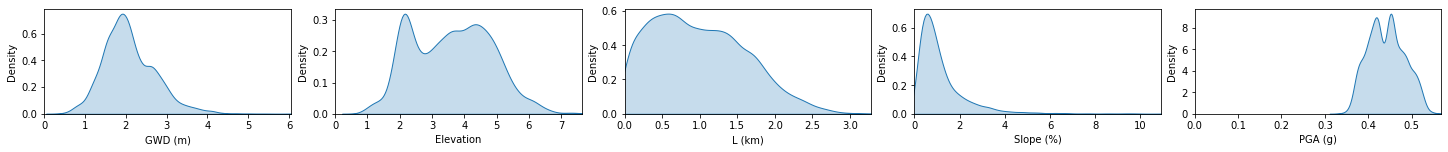

In [5]:
plots.distribution(X_all)

# Local explanations

## Training dataset

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


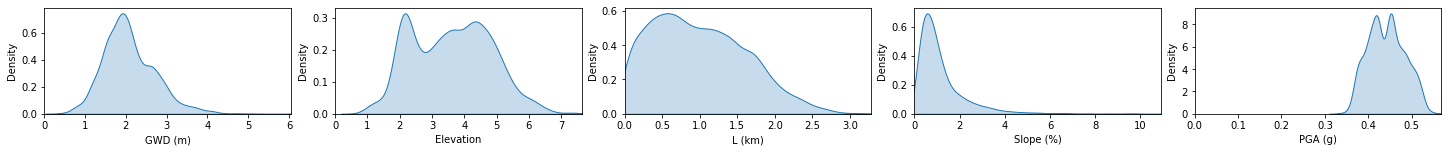

In [6]:
plots.distribution(X_train)

## Case of lateral spreading

In [7]:
# explain the model's predictions using SHAP
# compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [8]:
X_train.reset_index()
X_train_target = X_train_target.reset_index()

In [9]:
X_train_target.loc[X_train_target['Target']==1].loc[X_train_target['L (km)'] < 0.1]

,index,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target
33,6658,38476.0,1.791397,2.204310,0.058325,1.377933,0.430167,1
44,6283,27957.0,1.978356,2.203756,0.076483,0.840727,0.443570,1
67,6661,38477.0,1.791397,2.162890,0.047181,1.223984,0.430167,1
78,6364,28689.0,1.840220,2.103184,0.063494,0.558119,0.426110,1
99,6355,27985.0,1.885435,2.182913,0.080049,0.190712,0.426110,1
...,...,...,...,...,...,...,...,...
5588,6211,1951.0,1.580263,1.868797,0.008480,2.790839,0.441114,1
5616,6367,24528.0,1.885435,2.174401,0.084550,0.190712,0.426110,1
5620,6849,45014.0,1.524135,1.806022,0.054448,0.817829,0.440737,1
5644,6231,864.0,1.096305,1.865666,0.016827,1.745031,0.460332,1


This is the case where the length to the river is short

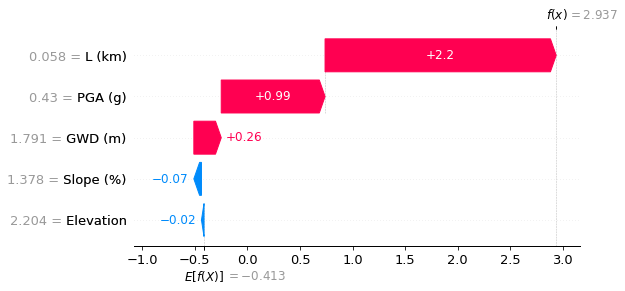

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


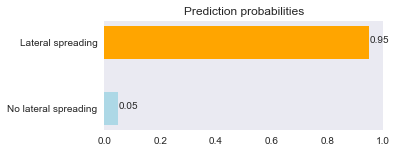

Percentile compare to the overall dataset


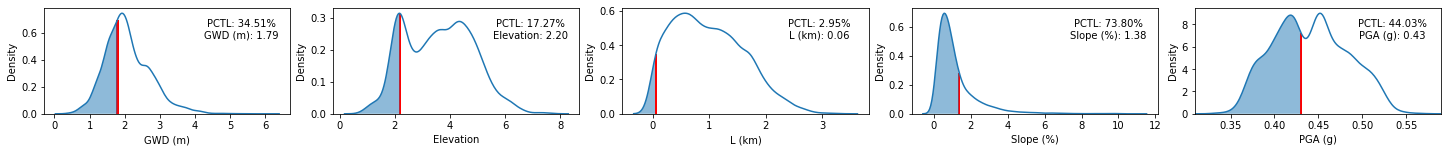

In [10]:
idx = 33
plot_summary(idx, shap_values, X_train)

## Case of no lateral spreading

In [11]:
X_train_target.loc[X_train_target['Target']==0].loc[X_train_target['L (km)'] > 3]

,index,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target
1260,4292,8203.0,1.671973,5.763018,3.035505,1.523700,0.350720,0
1667,4255,8204.0,1.530668,5.472616,3.221632,0.943458,0.351422,0
2472,4269,32250.0,1.023264,4.990308,3.069003,0.109984,0.357425,0
3052,4277,16832.0,0.669578,4.666982,3.001999,1.740389,0.362695,0
3999,4274,7975.0,1.197707,5.018595,3.100567,0.354440,0.357425,0
4601,4252,19563.0,1.667777,5.748554,3.289537,0.068539,0.354464,0
4888,4273,22454.0,1.058862,5.097780,3.084513,0.768944,0.357425,0


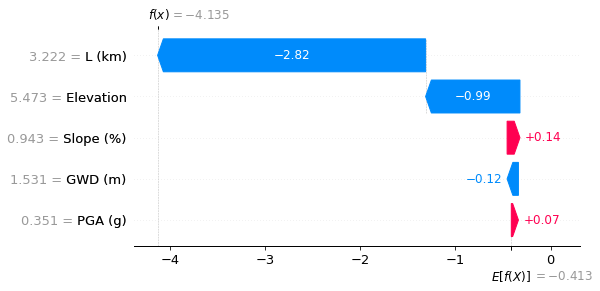

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


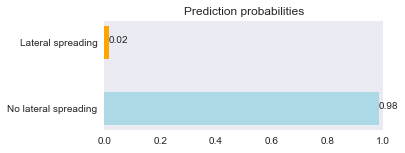

Percentile compare to the overall dataset


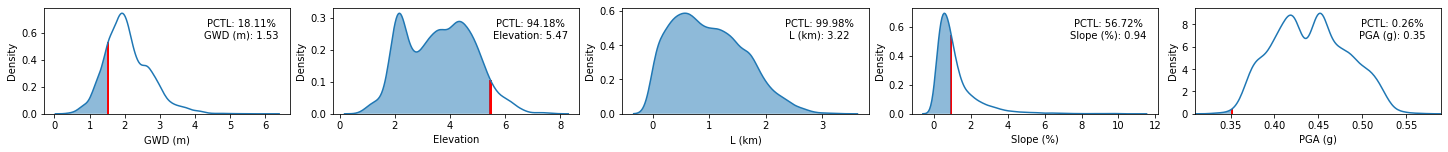

In [12]:
# visualize no lateral spreading prediction explanation
idx = 1667
plot_summary(idx, shap_values, X_train)

# Local explanations (Grouped by Type)

## Accuracy

In [13]:
# make prediction
preds = model.predict(X_test)
predictions = [round(value) for value in preds]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.75%


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


In [14]:
# Create a dataframe with errors
test_targets = X_test_target['Target']
error = predictions - test_targets
testdf = pd.concat([X_test_target, pd.DataFrame({'error':error})], axis=1)

## True Positive

In [15]:
# Target = 1 (lateral spreading)
tp = testdf[testdf['error'] == 0]
tp = tp[tp['Target'] == 1]

X_true_pos = tp.drop(['Test ID', 'Target', 'error'], axis=1)
tp.head()

,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target,error
6223,1105.0,1.907509,2.180654,0.018965,2.768473,0.453612,1,0
6159,6484.0,1.850592,2.628070,0.235409,0.563337,0.458787,1,0
6258,24556.0,1.783691,2.027417,0.054444,0.363844,0.446919,1,0
233,49594.0,1.601831,3.278744,0.329205,2.648838,0.443143,1,0
1681,37333.0,2.292893,4.621037,1.950595,0.173166,0.374504,1,0


Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


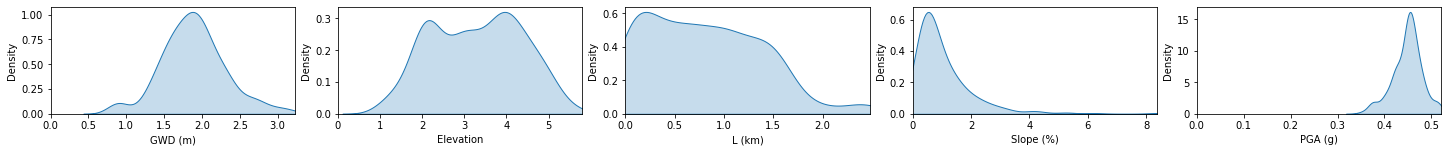

In [16]:
plots.distribution(X_true_pos)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


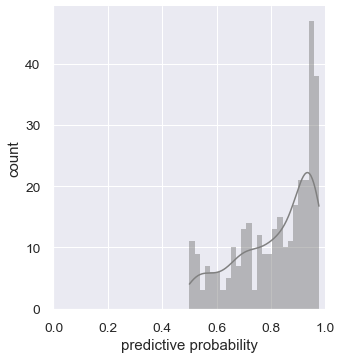

In [17]:
# Prediction probability
prob = model.predict_proba(X_true_pos)
plots.pred_prob(prob[:,1])

In [18]:
# SHAP values of false positive dataset
tp_shap_values = explainer(X_true_pos)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [19]:
tp.head()

,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target,error
6223,1105.0,1.907509,2.180654,0.018965,2.768473,0.453612,1,0
6159,6484.0,1.850592,2.628070,0.235409,0.563337,0.458787,1,0
6258,24556.0,1.783691,2.027417,0.054444,0.363844,0.446919,1,0
233,49594.0,1.601831,3.278744,0.329205,2.648838,0.443143,1,0
1681,37333.0,2.292893,4.621037,1.950595,0.173166,0.374504,1,0


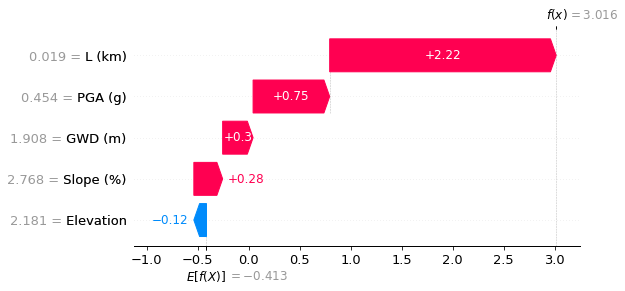

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


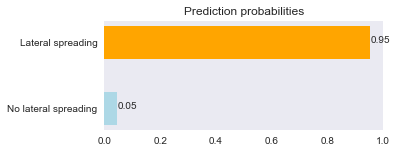

Percentile compare to the overall dataset


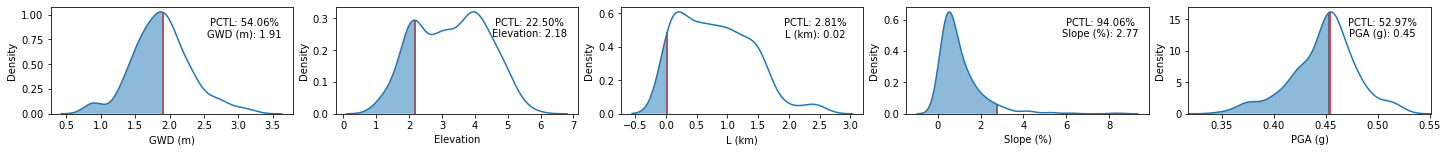

In [20]:
# visualize lateral spreading prediction's explanation
idx = 0
plot_summary(idx, tp_shap_values, X_true_pos)

#### Large distance (L > 2 km), why do we still predict lateral spreading?

In [21]:
tpfar = tp[tp['L (km)'] > 2]
Xfar = tpfar.drop(['Test ID', 'Target', 'error'], axis=1)
tpfar.head()

,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target,error
4324,25469.0,0.910922,4.133869,2.436380,0.548276,0.377160,1,0
4256,43421.0,1.014384,4.866963,2.364109,2.446507,0.375249,1,0
4331,24460.0,0.913812,4.120134,2.430121,0.624637,0.377160,1,0
4896,25200.0,2.101239,5.800049,2.001274,1.339319,0.358632,1,0
4321,8268.0,0.905382,4.210365,2.386378,0.189046,0.374701,1,0


Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


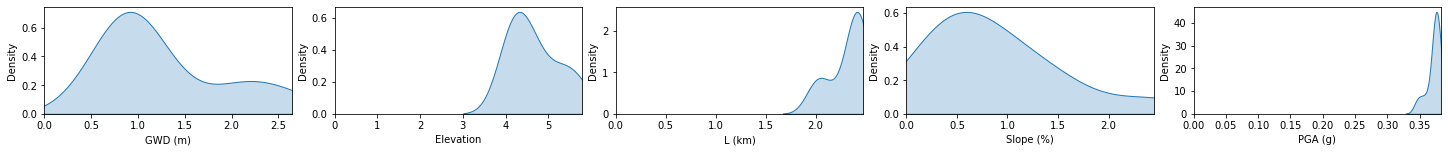

In [22]:
plots.distribution(Xfar)

In [23]:
# SHAP values of X far dataset
xfar_shap_values = explainer(Xfar)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


### Length is > 2.45 kms but the GWD is closer to the surface

In [24]:
tpfar = tpfar.reset_index()
tpfar.loc[tpfar['L (km)']>2.45]

,index,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target,error
7,4263,37405.0,0.903042,4.554835,2.476874,0.258458,0.372217,1,0


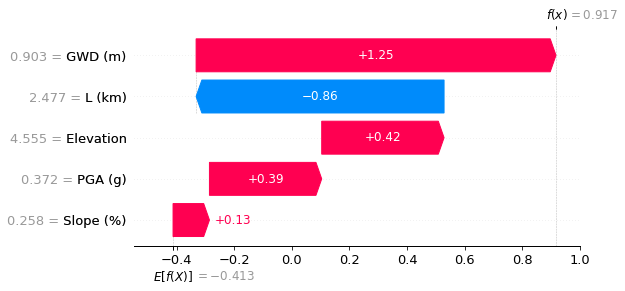

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


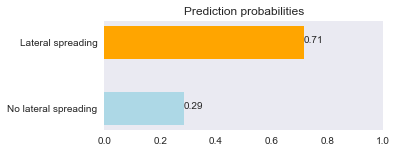

Percentile compare to the overall dataset


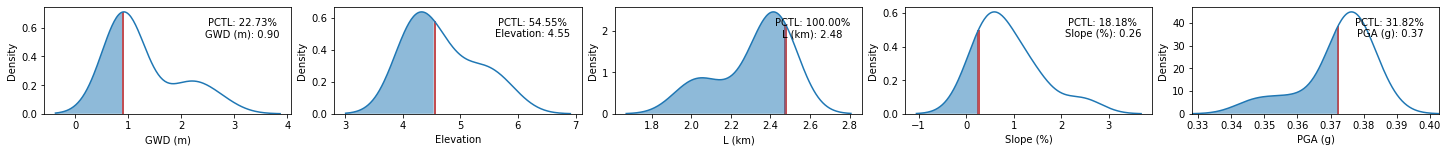

In [25]:
# visualize lateral spreading prediction's explanation
idx = 7
plot_summary(idx, xfar_shap_values, Xfar)

### GWD is deep

In [26]:
tpfar.loc[tpfar['GWD (m)'] > 2]

,index,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target,error
3,4896,25200.0,2.101239,5.800049,2.001274,1.339319,0.358632,1,0
5,5268,45542.0,2.642566,5.358510,2.012517,0.563027,0.383534,1,0
6,7084,34326.0,2.128562,5.433426,2.141897,1.513339,0.347488,1,0


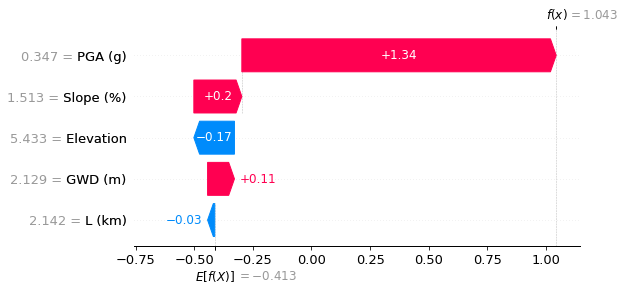

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


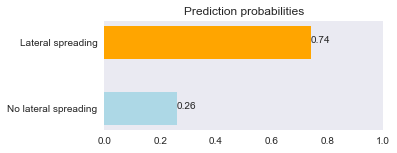

Percentile compare to the overall dataset


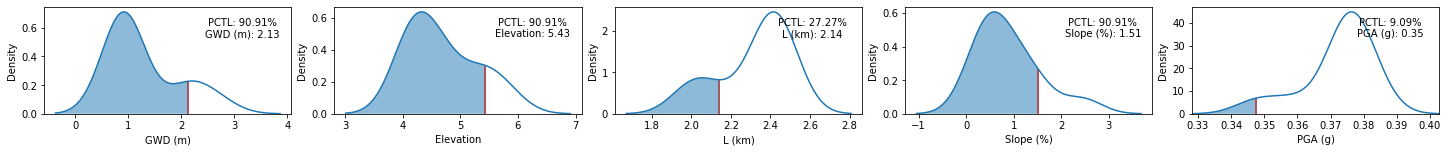

In [27]:
idx = 6
plot_summary(idx, xfar_shap_values, Xfar)

## True Negative

In [28]:
# Target = 0 (no-lateral spreading)
tn = testdf[testdf['error'] == 0]
tn = tn[tn['Target'] == 0]

X_true_neg = tn.drop(['Test ID', 'Target', 'error'], axis=1)
tn = tn.reset_index()
tn.head()

,index,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target,error
0,5940,56009.0,2.127889,2.769902,0.391166,0.550378,0.448694,0,0
1,7233,32874.0,1.709347,6.337670,1.277059,2.697200,0.396269,0,0
2,1642,25559.0,2.905616,3.561384,0.324857,1.051902,0.416268,0,0
3,5451,530.0,2.775991,4.151203,0.333152,0.720559,0.436192,0,0
4,6503,7689.0,2.036254,2.035564,0.402256,0.772629,0.457570,0,0


Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


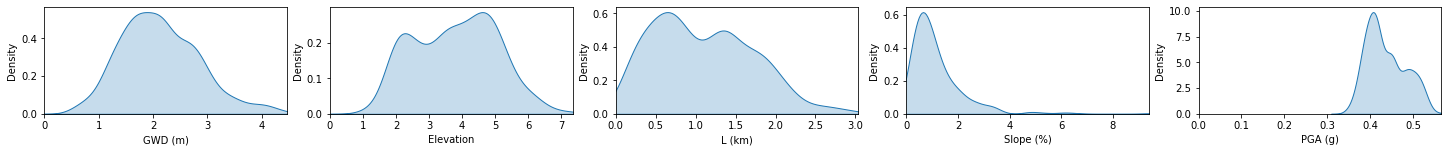

In [29]:
plots.distribution(X_true_neg)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


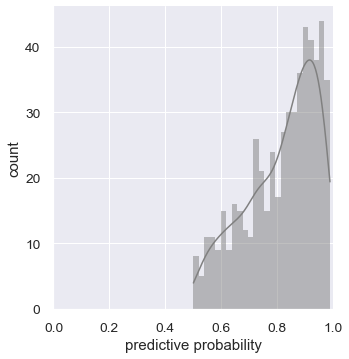

In [30]:
# Prediction probability
prob = model.predict_proba(X_true_neg)
plots.pred_prob(prob[:,0])

In [31]:
# SHAP values of X far dataset
tn_shap_values = explainer(X_true_neg)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


### No lateral spreading due to far away distance

In [32]:
tn.loc[tn['L (km)'] > 2].head()

,index,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target,error
27,4316,18981.0,0.721545,4.194411,2.639945,0.574291,0.368636,0,0
39,915,54309.0,1.915671,4.719206,2.206567,1.031268,0.512585,0,0
65,4503,25067.0,1.535410,4.457108,2.125216,0.671203,0.385182,0,0
69,2246,2776.0,1.706274,3.993931,2.109644,0.848471,0.392446,0,0
70,2180,25799.0,1.565471,3.657609,2.226305,0.615057,0.379191,0,0


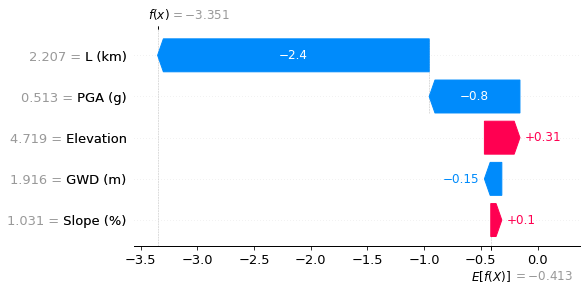

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


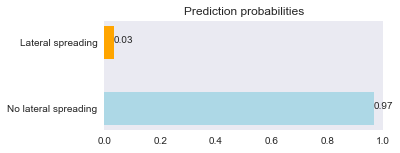

Percentile compare to the overall dataset


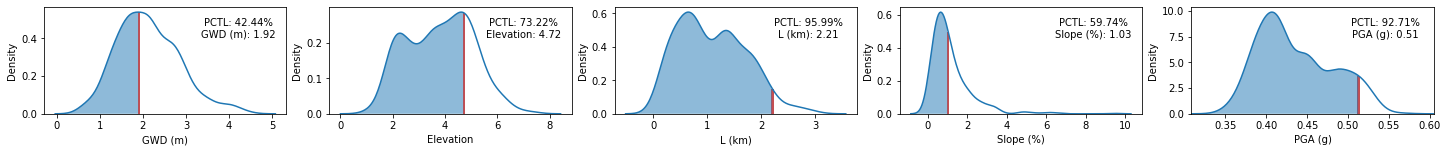

In [33]:
plot_summary(39, tn_shap_values, X_true_neg)

### True negative at short distances (L)

In [34]:
tn.loc[tn['L (km)'] < 0.5].loc[tn['GWD (m)'] > 3]

,index,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target,error
6,5816,5083.0,3.042242,3.520863,0.149327,0.661831,0.443339,0,0
44,1568,5661.0,3.260730,4.217430,0.306681,1.507082,0.413789,0,0
54,5772,34434.0,3.402332,4.172103,0.170213,0.494863,0.434475,0,0
56,5764,34428.0,3.333070,4.193228,0.182596,0.217464,0.434475,0,0
60,1904,25621.0,3.443651,3.972750,0.169952,1.890133,0.426905,0,0
86,972,17484.0,3.317045,3.609877,0.452786,0.847155,0.474041,0,0
287,1572,5725.0,3.260730,4.199584,0.325637,2.178741,0.413789,0,0
336,1908,17849.0,3.443651,3.978889,0.168119,1.890133,0.426905,0,0
386,5776,21428.0,3.473058,4.132950,0.113498,0.796042,0.434475,0,0
441,5532,51781.0,3.007784,4.432241,0.480138,0.868730,0.424651,0,0


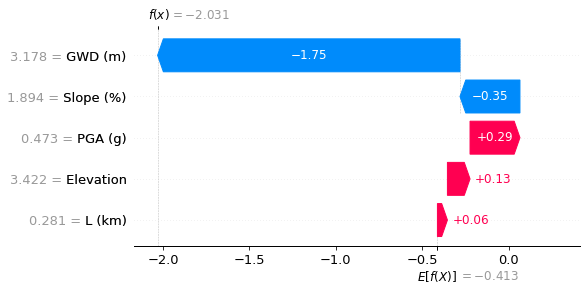

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


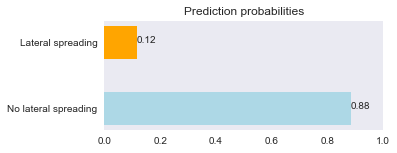

Percentile compare to the overall dataset


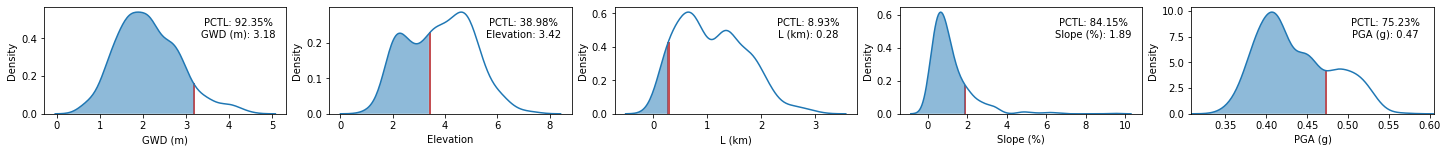

In [35]:
# visualize no lateral spreading prediction's explanation (3)
idx = 535
plot_summary(idx, tn_shap_values, X_true_neg)

### False positive

In [36]:
# Error is 1 means prediction 1 (lateral spreading) while target is 0 (no-lateral spreading)
fp = testdf[testdf['error'] == 1]
X_false_pos = fp.drop(['Test ID', 'Target', 'error'], axis=1)
fp = fp.reset_index()
fp.head()

,index,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target,error
0,6045,849.0,1.363712,1.973075,0.015393,3.455205,0.467415,0,1
1,3300,4643.0,1.907738,2.959213,0.549842,1.284769,0.475826,0,1
2,5801,117.0,1.152698,1.661441,0.010883,0.680831,0.443878,0,1
3,3079,39016.0,2.561165,4.853942,1.101195,2.415555,0.439881,0,1
4,3121,5403.0,1.950276,3.294763,0.512882,0.559403,0.473471,0,1


Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


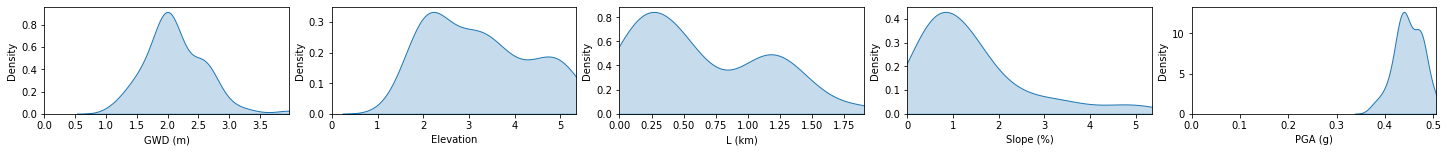

In [37]:
plots.distribution(X_false_pos)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


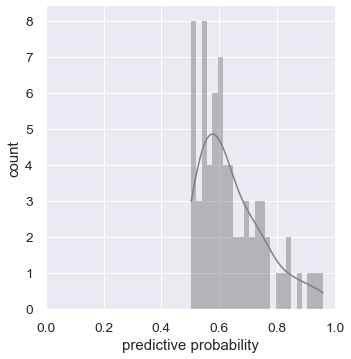

In [38]:
# Prediction probability
prob = model.predict_proba(X_false_pos)
plots.pred_prob(prob[:,1])

In [39]:
# SHAP values of false positive dataset
fp_shap_values = explainer(X_false_pos)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


## Fails for close distance to river

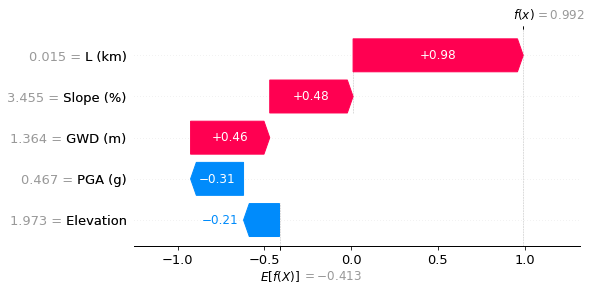

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


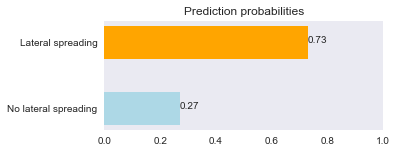

Percentile compare to the overall dataset


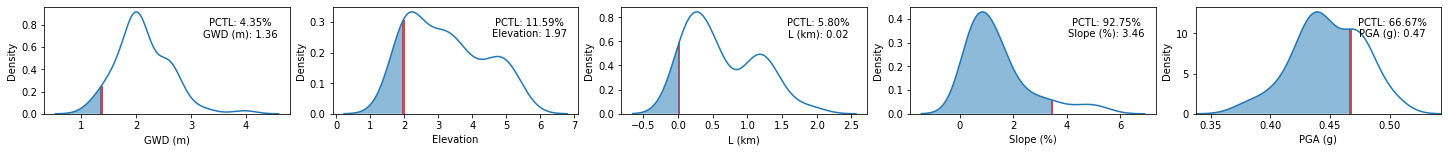

In [40]:
# visualize lateral spreading prediction's explanation - The elevation and slope values are zero
idx=0
plot_summary(idx, fp_shap_values, X_false_pos)

## High slope angle triggered a false positive

In [43]:
fp.loc[fp['PGA (g)'] > 0.5]

,index,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target,error
8,1052,11323.0,3.297105,3.426086,1.415013,5.352208,0.506117,0,1
66,4089,26127.0,1.535537,1.952208,0.236454,0.556948,0.502852,0,1
68,4091,11167.0,1.582196,1.962248,0.273601,1.404930,0.502852,0,1


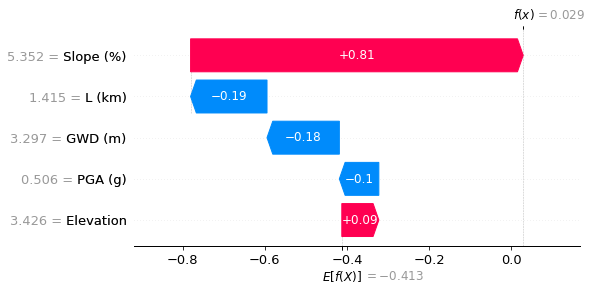

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


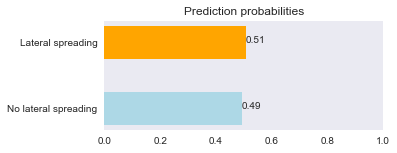

Percentile compare to the overall dataset


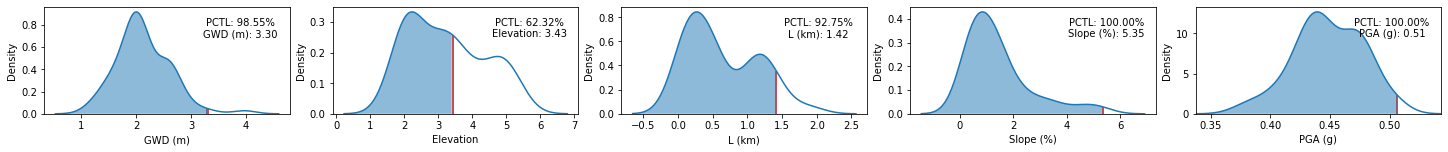

In [44]:
plot_summary(8, fp_shap_values, X_false_pos)

### Low PGAs triggering liquefaction all these points are at high elevation

In [46]:
fp.loc[fp['PGA (g)'] < 0.4]

,index,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target,error
21,5034,44035.0,2.680602,5.260268,1.904993,0.540952,0.385105,0,1
45,1748,32906.0,2.737708,4.991457,1.477740,0.596577,0.386724,0,1
63,1699,37338.0,2.535733,4.875050,1.880284,0.975361,0.374504,0,1


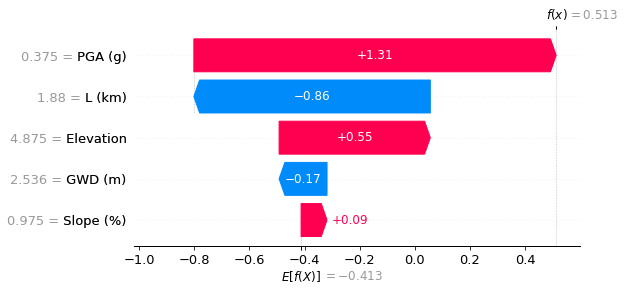

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


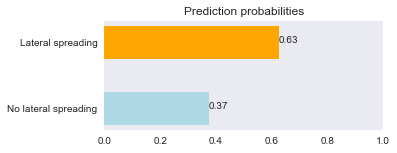

Percentile compare to the overall dataset


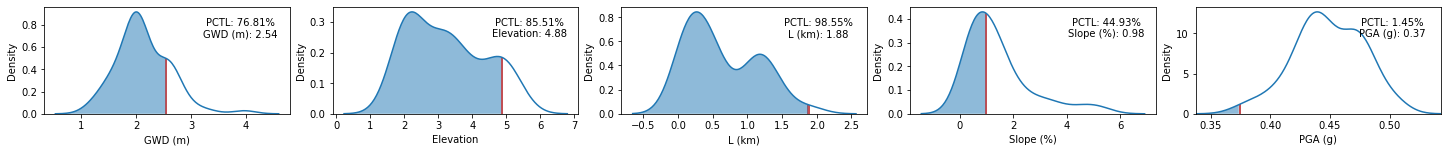

In [49]:
plot_summary(63, fp_shap_values, X_false_pos)

### False negatives

In [54]:
# Error is -1 means prediction 0 (no-lateral spreading) while target is 1 (lateral spreading)
fn = testdf[testdf['error'] == -1]

X_false_neg = fn.drop(['Test ID', 'Target', 'error'], axis=1)
fn = fn.reset_index()
fn.head()

,index,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target,error
0,5092,34610.0,1.642506,3.980772,0.943866,6.170671,0.417414,1,-1
1,5477,41953.0,2.783627,4.402873,0.481081,0.489516,0.422283,1,-1
2,4291,34717.0,1.184457,4.568749,2.256196,0.998763,0.377765,1,-1
3,5490,41954.0,2.874965,4.447255,0.466306,0.480653,0.424651,1,-1
4,2097,32959.0,1.930622,2.487270,0.465034,0.900893,0.428506,1,-1


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


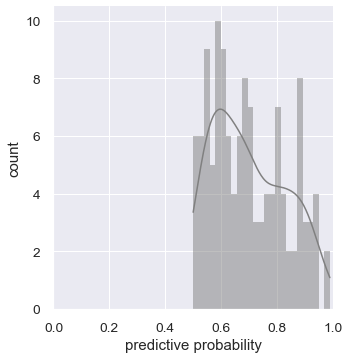

In [55]:
# Prediction probability
prob = model.predict_proba(X_false_neg)
plots.pred_prob(prob[:,0])

In [56]:
# SHAP values of false negative dataset
fn_shap_values = explainer(X_false_neg)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


### Distance is too far

In [58]:
fn.loc[fn['L (km)'] > 2]

,index,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target,error
2,4291,34717.0,1.184457,4.568749,2.256196,0.998763,0.377765,1,-1
8,4330,4956.0,1.092189,4.424129,2.315552,0.971153,0.380259,1,-1
23,1787,24628.0,2.314934,4.429238,2.317660,2.562188,0.368342,1,-1
43,4515,4601.0,1.654792,4.715810,2.018813,0.608391,0.385182,1,-1
48,7155,48656.0,2.302286,5.847261,2.739961,0.545546,0.364377,1,-1
60,4906,3940.0,1.772278,5.549990,2.253003,0.366992,0.373508,1,-1
63,4258,19283.0,0.672930,4.401370,2.426664,0.466489,0.372217,1,-1
65,4834,12457.0,2.072486,5.665108,2.269473,0.303873,0.370539,1,-1
123,4844,622.0,1.550176,4.911312,2.150808,1.117937,0.379597,1,-1


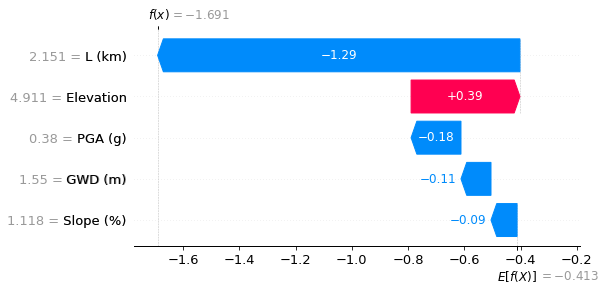

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


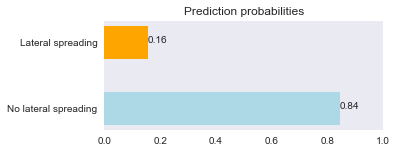

Percentile compare to the overall dataset


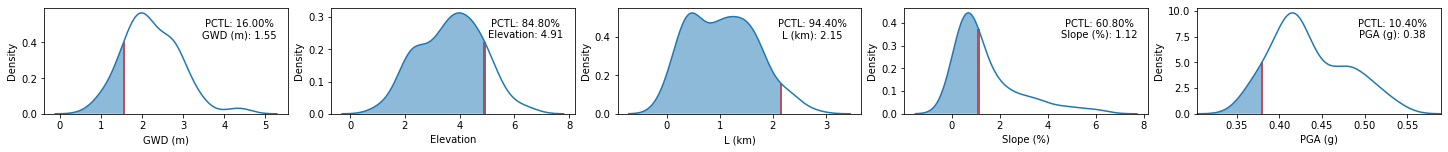

In [60]:
# The elevation and slope values are zero
idx=123
plot_summary(idx, fn_shap_values, X_false_neg)

### Distance is close but predicts false negative value

In [61]:
fn.loc[fn['L (km)'] < 0.5]

,index,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target,error
1,5477,41953.0,2.783627,4.402873,0.481081,0.489516,0.422283,1,-1
3,5490,41954.0,2.874965,4.447255,0.466306,0.480653,0.424651,1,-1
4,2097,32959.0,1.930622,2.487270,0.465034,0.900893,0.428506,1,-1
6,5575,50320.0,2.425169,3.576956,0.325109,0.492121,0.430414,1,-1
11,8,161.0,1.884515,1.692008,0.064009,0.173425,0.535902,1,-1
14,4055,48880.0,2.358732,2.878144,0.417065,0.987149,0.496623,1,-1
19,5762,15614.0,2.341032,2.824085,0.334529,2.211929,0.444435,1,-1
20,6523,38301.0,3.475307,3.356515,0.044242,3.295177,0.424457,1,-1
26,1965,49781.0,2.933140,3.310227,0.150941,0.737199,0.429340,1,-1
29,5657,23422.0,2.601460,3.847851,0.379507,0.136559,0.423135,1,-1


### Deeper GWD

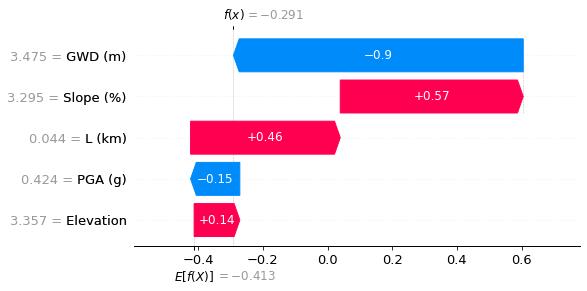

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


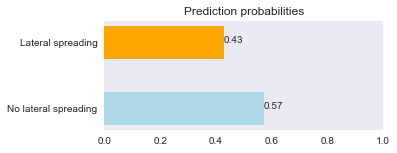

Percentile compare to the overall dataset


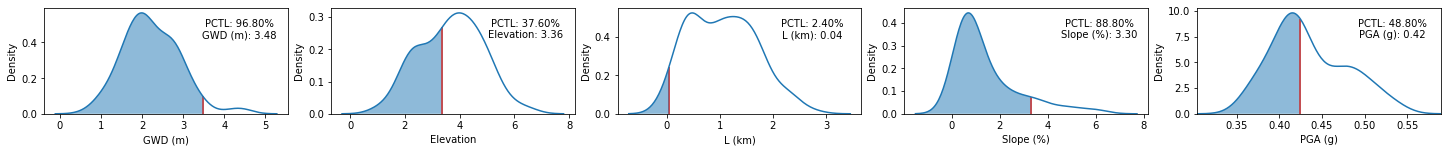

In [62]:
idx = 20
plot_summary(20, fn_shap_values, X_false_neg)

#### Shallow GWD < 2m 

In [66]:
fn.loc[fn['L (km)'] < 0.5].loc[fn['GWD (m)'] < 2]

,index,Test ID,GWD (m),Elevation,L (km),Slope (%),PGA (g),Target,error
4,2097,32959.0,1.930622,2.487270,0.465034,0.900893,0.428506,1,-1
11,8,161.0,1.884515,1.692008,0.064009,0.173425,0.535902,1,-1
53,6987,1423.0,1.485332,1.808828,0.044273,1.209664,0.469081,1,-1
57,6871,14933.0,1.879848,2.145229,0.302448,0.230420,0.449792,1,-1
59,6856,27347.0,1.850813,2.053900,0.205620,0.262268,0.449792,1,-1
74,12,178.0,1.723189,1.754743,0.007539,0.962260,0.535902,1,-1
80,7075,160.0,1.674603,1.134653,0.380210,0.613858,0.529289,1,-1
87,6178,1104.0,1.500577,1.910612,0.315198,1.530293,0.448712,1,-1
89,4070,15638.0,1.509374,1.018703,0.341521,0.773092,0.514378,1,-1
97,5927,9018.0,1.901494,2.389130,0.286622,0.084138,0.452022,1,-1


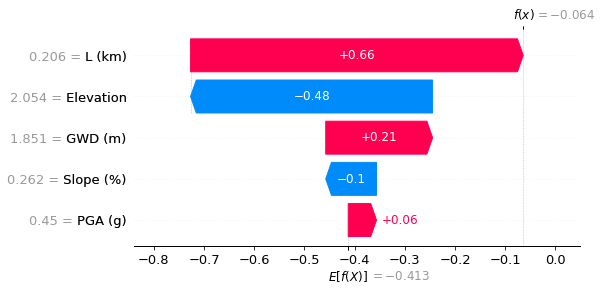

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


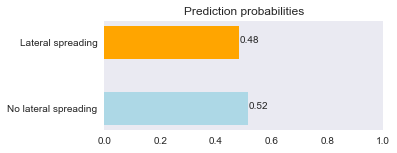

Percentile compare to the overall dataset


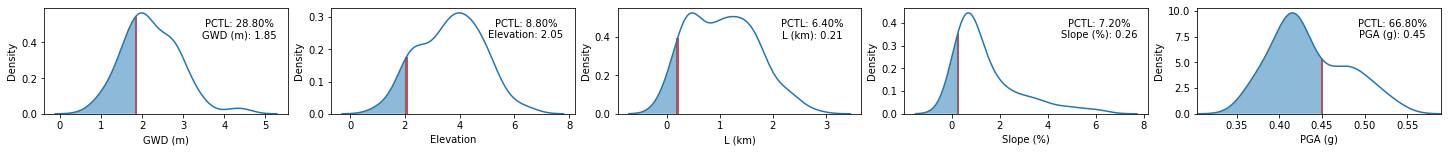

In [73]:
idx = 59
plot_summary(idx, fn_shap_values, X_false_neg)

### Where high PGA affects the results

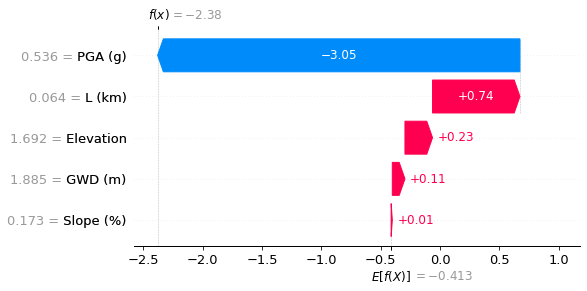

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


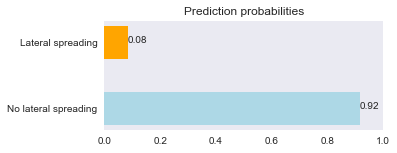

Percentile compare to the overall dataset


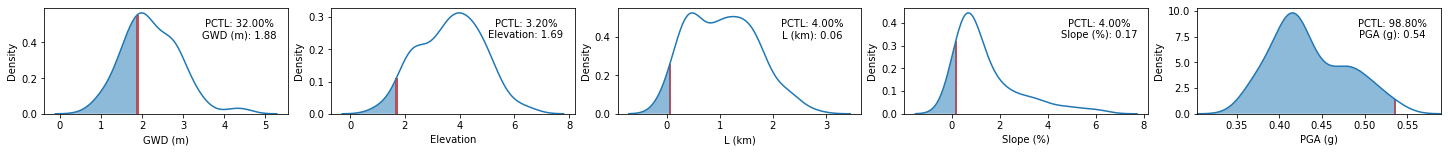

In [69]:
idx = 11
plot_summary(idx, fn_shap_values, X_false_neg)

# Global explanations

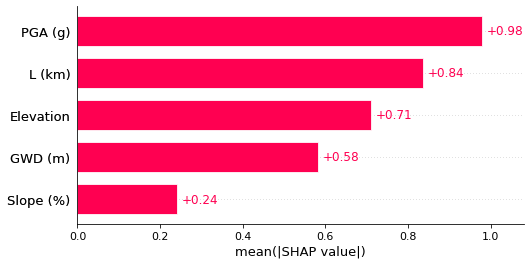

In [ ]:
shap.plots.bar(shap_values)

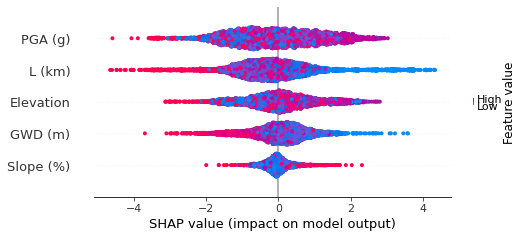

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

## True Positives

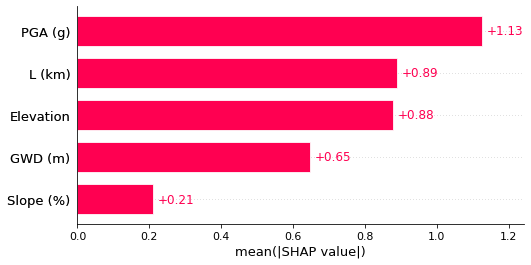

In [ ]:
shap.plots.bar(tp_shap_values)

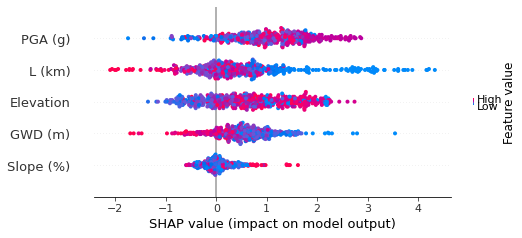

In [ ]:
# summarize the effects of all the features
shap.plots.beeswarm(tp_shap_values)

### True negative

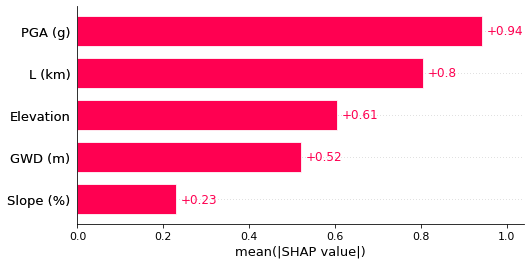

In [ ]:
shap.plots.bar(tn_shap_values)

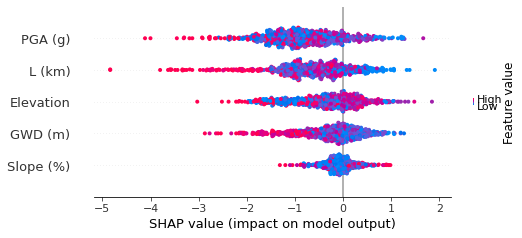

In [ ]:
shap.plots.beeswarm(tn_shap_values)

### False positives

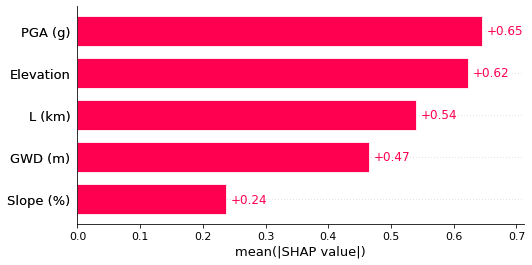

In [ ]:
shap.plots.bar(fp_shap_values)

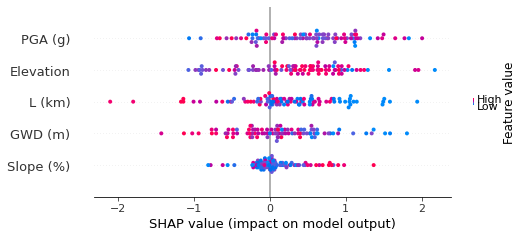

In [ ]:
shap.plots.beeswarm(fp_shap_values)

### False Negative

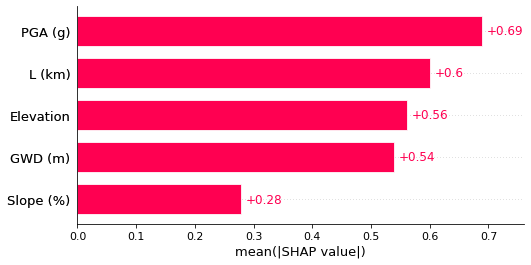

In [ ]:
shap.plots.bar(fn_shap_values)

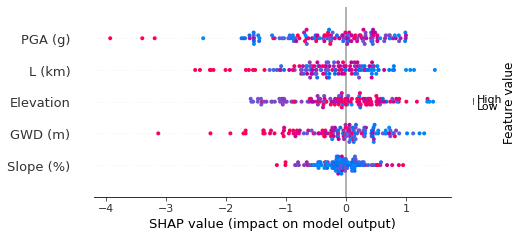

In [ ]:
shap.plots.beeswarm(fn_shap_values)

# Feature relations

In [ ]:
# explain the model's predictions using SHAP
# compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.dependence_plot('PGA (g)', shap_values, X_train, interaction_index="Elevation")

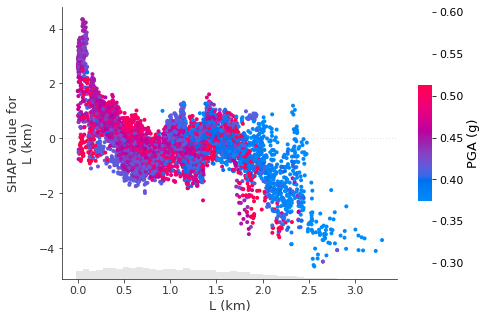

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"L (km)"], color=shap_values)

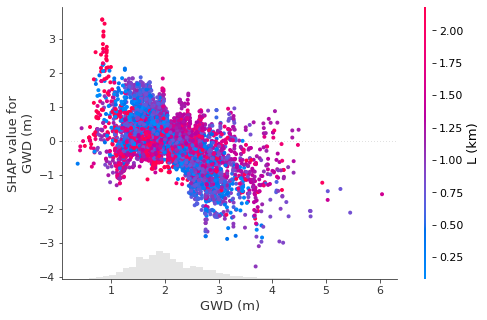

In [ ]:
shap.plots.scatter(shap_values[:,"GWD (m)"], color=shap_values)

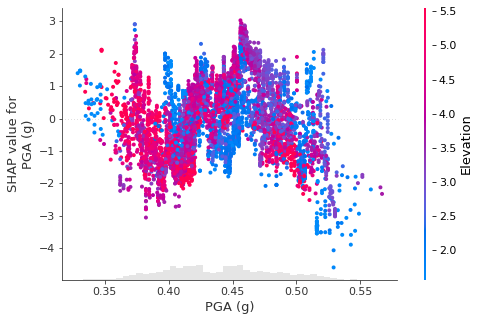

In [ ]:
shap.plots.scatter(shap_values[:,"PGA (g)"], color=shap_values)

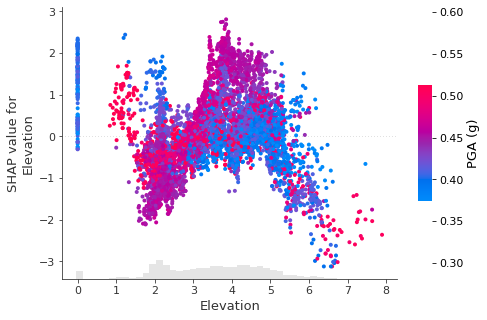

In [ ]:
shap.plots.scatter(shap_values[:,"Elevation"], color=shap_values)

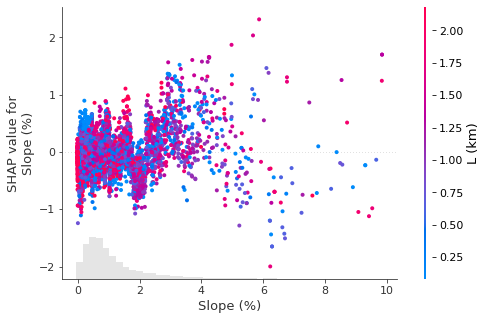

In [ ]:
shap.plots.scatter(shap_values[:,"Slope (%)"], color=shap_values)

In [27]:
shap.dependence_plot("PGA (g)", shap_values[1], X_train)

TypeError: order must be str, not int

## Relation plots

### Scatter plot of GWD (m) vs SHAP values

The GWD is the first column of the SHAP values matrix.

In [ ]:
# GWD datset
gwd = shap_values.data[:,0]
gwd_shap = shap_values.values[:,0]
gwd_shap_dataset = np.array(list(zip(gwd, gwd_shap)))
target = X_train_target['Target']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


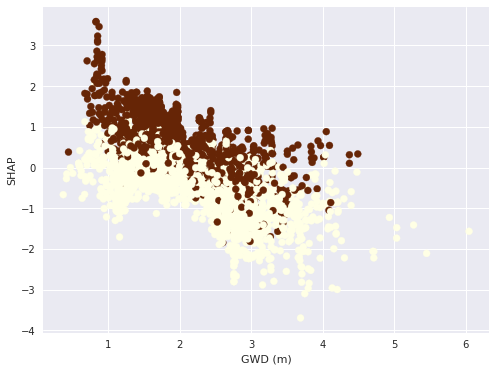

In [ ]:
with plt.style.context(('ggplot', 'seaborn')):
    plt.figure(figsize=(8,6))
    plt.scatter(gwd, gwd_shap, c=target, cmap='YlOrBr')

    plt.xlabel('GWD (m)')
    plt.ylabel('SHAP')
    plt.legend(loc='best')

### Distance to river

In [ ]:
# GWD datset
l = shap_values.data[:,2]
l_shap = shap_values.values[:,2]
l_shap_dataset = np.array(list(zip(l, l_shap)))
target = X_train_target['Target']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


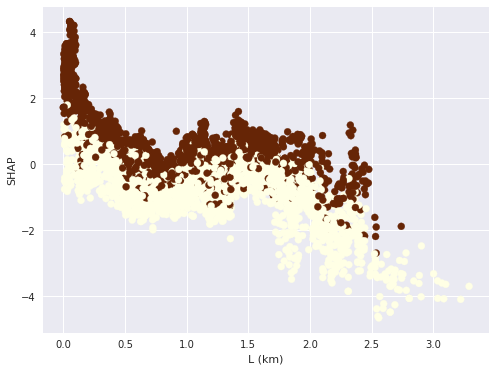

In [ ]:
with plt.style.context(('ggplot', 'seaborn')):
    plt.figure(figsize=(8,6))
    plt.scatter(l, l_shap, c=target, cmap='YlOrBr')

    plt.xlabel('L (km)')
    plt.ylabel('SHAP')
    plt.legend(loc='best')

### PGA SHAP values

In [ ]:
# GWD datset
pga = shap_values.data[:,4]
pga_shap = shap_values.values[:,4]
pga_shap_dataset = np.array(list(zip(pga, pga_shap)))
target = X_train_target['Target']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


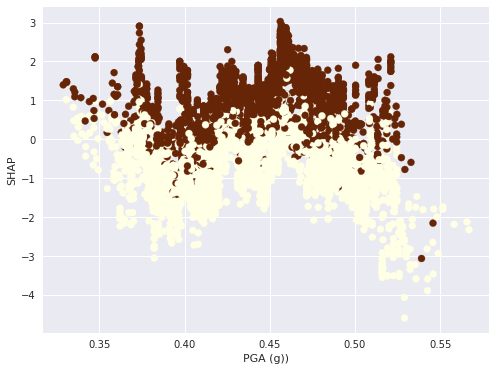

In [ ]:
with plt.style.context(('ggplot', 'seaborn')):
    plt.figure(figsize=(8,6))
    plt.scatter(pga, pga_shap, c=target, cmap='YlOrBr')

    plt.xlabel('PGA (g))')
    plt.ylabel('SHAP')
    plt.legend(loc='best')

## Slope

In [ ]:
# GWD datset
slope = shap_values.data[:,3]
slope_shap = shap_values.values[:,3]
slope_shap_dataset = np.array(list(zip(pga, pga_shap)))
target = X_train_target['Target']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


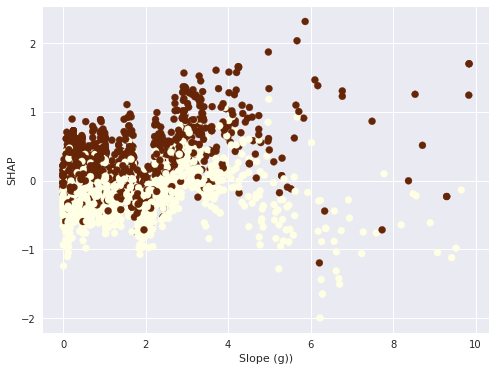

In [ ]:
with plt.style.context(('ggplot', 'seaborn')):
    plt.figure(figsize=(8,6))
    plt.scatter(slope, slope_shap, c=target, cmap='YlOrBr')

    plt.xlabel('Slope (g))')
    plt.ylabel('SHAP')
    plt.legend(loc='best')